# MC-321 LAB ASSIGNMENT - 3
### ID: 202203038

In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from itertools import combinations

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Real estate valuation data set.xlsx"

Mounted at /content/drive


# Question 1
f(x) = x + 2 · sin(0.5 · x)

### 1. Generate the data: Generate 50 data points for x ∈ [−10, 10] by adding noise drawn from a Gaussian distribution with mean 0 and variance 0.5 to the true function.


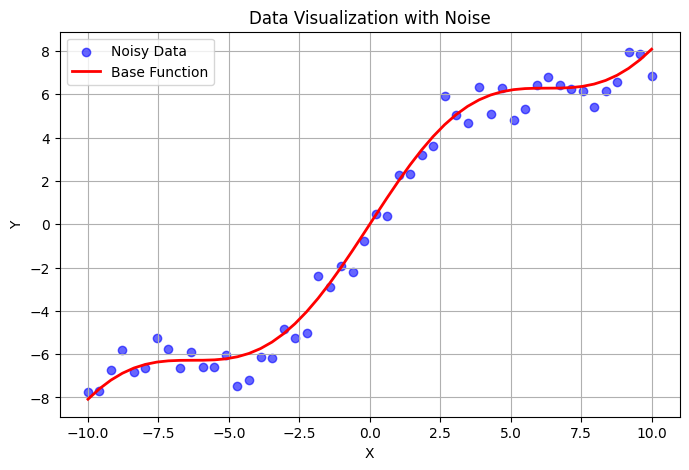

In [ ]:
def curve_with_variation(x):
    return x + 2 * np.sin(0.5 * x)

np.random.seed(42)
x_data = np.linspace(-10, 10, 50)
noise_factor = np.random.normal(0, np.sqrt(0.5), size=x_data.shape)

y_data = curve_with_variation(x_data) + noise_factor

plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, label="Noisy Data", color="blue", alpha=0.6)
plt.plot(x_data, curve_with_variation(x_data), label="Base Function", color="red", linewidth=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data Visualization with Noise")
plt.legend()
plt.grid(True)
plt.show()

### 2. Optimal model capacity: Use the learnt w to predict labels on test data and measure squared error on the test set. Plot the training and generalization error against the model capacity for each case.

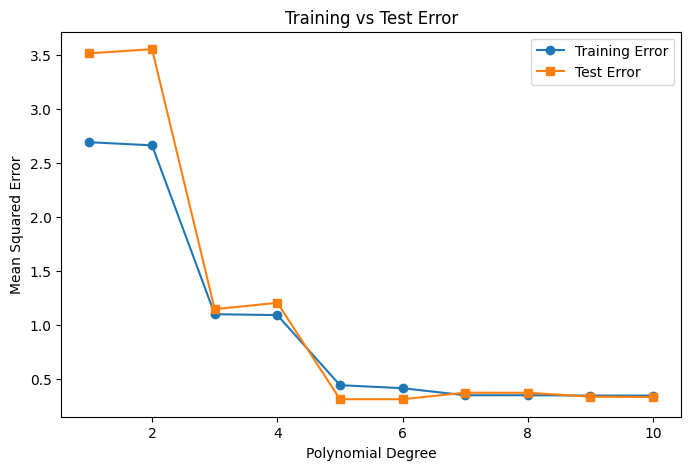

In [ ]:
np.random.seed(42)

def base_curve(x):
    return x + 2 * np.sin(0.5 * x)

x_vals = np.linspace(-10, 10, 50)
y_actual = base_curve(x_vals)

y_observed = y_actual + np.random.normal(0, np.sqrt(0.5), size=x_vals.shape)

x_train, x_test, y_train, y_test = train_test_split(x_vals, y_observed, test_size=0.2, random_state=42)

x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

train_mse = []
test_mse = []
poly_degrees = range(1, 11)

for deg in poly_degrees:
    poly_features = PolynomialFeatures(degree=deg)
    x_train_poly = poly_features.fit_transform(x_train)
    x_test_poly = poly_features.transform(x_test)

    reg_model = LinearRegression()
    reg_model.fit(x_train_poly, y_train)

    y_train_pred = reg_model.predict(x_train_poly)
    y_test_pred = reg_model.predict(x_test_poly)

    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(8, 5))
plt.plot(poly_degrees, train_mse, label="Training Error", marker="o")
plt.plot(poly_degrees, test_mse, label="Test Error", marker="s")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Training vs Test Error")
plt.legend()
plt.show()

### 3. Addressing overfitting and Regularization: Perform regularization on the curve with maximum overfitting.

Use more data: For the overfitting case, sample more training data points from the function, say 100, and now plot the true function, originally learnt curve, and the curve learnt on more data. What is the observation?

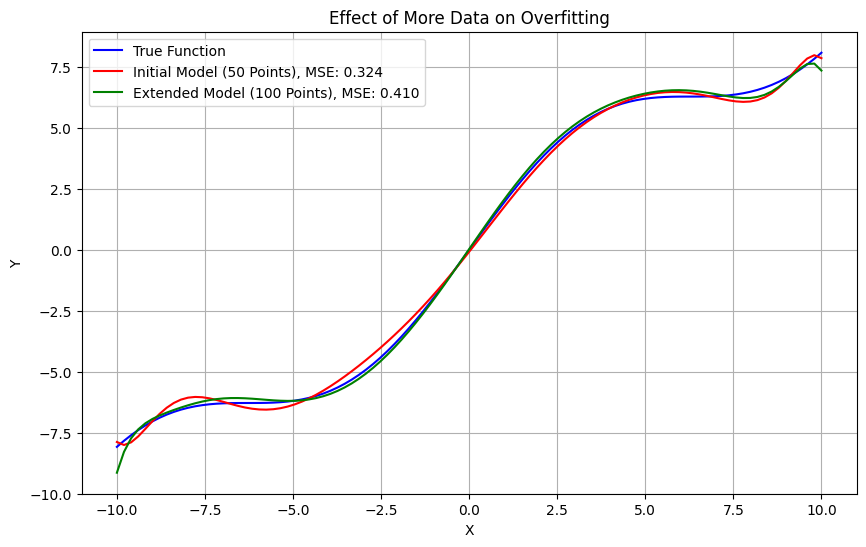

Initial Model (50 Points):
- Training MSE: 0.3235
- Generalization Error: 0.0506

Extended Model (100 Points):
- Training MSE: 0.4099
- Generalization Error: 0.0405


In [ ]:
def base_curve(x):
    return x + 2 * np.sin(0.5 * x)

x_train = np.linspace(-10, 10, 50)
train_noise = np.random.normal(0, np.sqrt(0.5), size=x_train.shape)
y_train = base_curve(x_train) + train_noise

x_extra = np.linspace(-10, 10, 100)
extra_noise = np.random.normal(0, np.sqrt(0.5), size=x_extra.shape)
y_extra_noisy = base_curve(x_extra) + extra_noise

x_test = np.linspace(-10, 10, 100)
y_test_actual = base_curve(x_test)

poly_degree = 12
poly_feat = PolynomialFeatures(poly_degree)

x_train_poly = poly_feat.fit_transform(x_train.reshape(-1, 1))
model_initial = LinearRegression().fit(x_train_poly, y_train)

x_extra_poly = poly_feat.fit_transform(x_extra.reshape(-1, 1))
model_extended = LinearRegression().fit(x_extra_poly, y_extra_noisy)

x_poly = poly_feat.transform(x_test.reshape(-1, 1))
pred_initial = model_initial.predict(x_poly)
pred_extended = model_extended.predict(x_poly)

mse_train_initial = mean_squared_error(y_train, model_initial.predict(x_train_poly))
mse_train_extended = mean_squared_error(y_extra_noisy, model_extended.predict(x_extra_poly))

gen_error_initial = mean_squared_error(y_test_actual, pred_initial)
gen_error_extended = mean_squared_error(y_test_actual, pred_extended)

plt.figure(figsize=(10, 6))
plt.plot(x_test, base_curve(x_test), label="True Function", color="blue")
plt.plot(x_test, pred_initial, label=f"Initial Model (50 Points), MSE: {mse_train_initial:.3f}", color="red")
plt.plot(x_test, pred_extended, label=f"Extended Model (100 Points), MSE: {mse_train_extended:.3f}", color="green")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Effect of More Data on Overfitting")
plt.legend()
plt.grid(True)
plt.show()

print(f"Initial Model (50 Points):")
print(f"- Training MSE: {mse_train_initial:.4f}")
print(f"- Generalization Error: {gen_error_initial:.4f}")

print(f"\nExtended Model (100 Points):")
print(f"- Training MSE: {mse_train_extended:.4f}")
print(f"- Generalization Error: {gen_error_extended:.4f}")

Lasso Regression: Perform Lasso regression on the cost function as follows, vary λ = 0 to 5 in steps of 0.5.
$$
J(w) = \frac{1}{N} \sum_{i=1}^{N} (y_i - (w_0 + w^T \phi_n(x_i)))^2 + \lambda |w|
$$

- Plot both training and test error for different values of λ or (ln λ) on the x-axis.  
  What value of hyperparameter **λ** is most suitable?  
  Is w sparse?  
  Plot the number of non-zero components of w against λ.  

- Plot the true function, and curves learnt with and without regularization. Compare and comment.  

- Plot the L1 norm of w against λ.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.154e+01, tolerance: 1.586e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

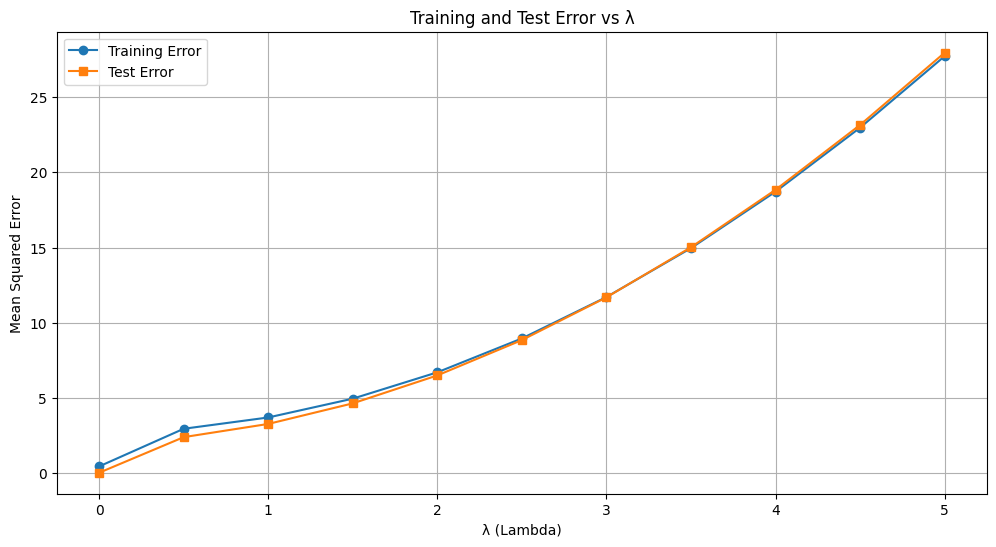

In [ ]:
def base_curve(x):
    return x + 2 * np.sin(0.5 * x)

def get_data():
    x_train = np.linspace(-10, 10, 50)
    train_noise = np.random.normal(0, np.sqrt(0.5), size=x_train.shape)
    y_train = base_curve(x_train) + train_noise

    x_test = np.linspace(-10, 10, 100)
    y_test_actual = base_curve(x_test)

    return x_train, y_train, x_test, y_test_actual

def transform_poly(x_train, x_test, degree=12):
    poly_feat = PolynomialFeatures(degree)
    x_train_poly = poly_feat.fit_transform(x_train.reshape(-1, 1))
    x_test_poly = poly_feat.transform(x_test.reshape(-1, 1))

    scaler = StandardScaler()
    x_train_poly_scaled = scaler.fit_transform(x_train_poly)
    x_test_poly_scaled = scaler.transform(x_test_poly)

    return x_train_poly_scaled, x_test_poly_scaled, poly_feat

def lasso_fit(x_train_poly, y_train, x_test_poly, y_test_actual, lambda_vals):
    train_mse, test_mse, non_zero_terms, l1_sums = [], [], [], []

    for lam in lambda_vals:
        lasso_model = Lasso(alpha=lam, max_iter=10000)
        lasso_model.fit(x_train_poly, y_train)

        y_train_pred = lasso_model.predict(x_train_poly)
        y_test_pred = lasso_model.predict(x_test_poly)

        train_mse.append(mean_squared_error(y_train, y_train_pred))
        test_mse.append(mean_squared_error(y_test_actual, y_test_pred))
        non_zero_terms.append(np.sum(lasso_model.coef_ != 0))
        l1_sums.append(np.sum(np.abs(lasso_model.coef_)))

    return train_mse, test_mse, non_zero_terms, l1_sums

x_train, y_train, x_test, y_test_actual = get_data()
x_train_poly, x_test_poly, poly_feat = transform_poly(x_train, x_test)

model_baseline = LinearRegression().fit(x_train_poly, y_train)
pred_baseline = model_baseline.predict(x_test_poly)

lambda_vals = np.arange(0, 5.5, 0.5)
train_mse, test_mse, non_zero_terms, l1_sums = lasso_fit(x_train_poly, y_train, x_test_poly, y_test_actual, lambda_vals)

plt.figure(figsize=(12, 6))
plt.plot(lambda_vals, train_mse, label="Training Error", marker="o")
plt.plot(lambda_vals, test_mse, label="Test Error", marker="s")
plt.xlabel("λ (Lambda)")
plt.ylabel("Mean Squared Error")
plt.title("Training and Test Error vs λ")
plt.legend()
plt.grid(True)
plt.show()

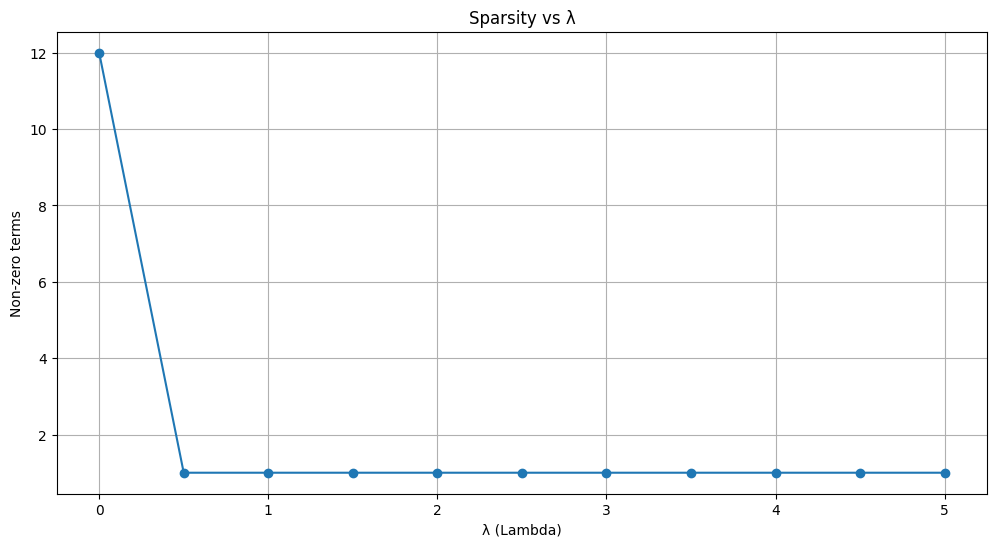

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(lambda_vals, non_zero_terms, marker='o')
plt.xlabel('λ (Lambda)')
plt.ylabel('Non-zero terms')
plt.title('Sparsity vs λ')
plt.grid(True)
plt.show()

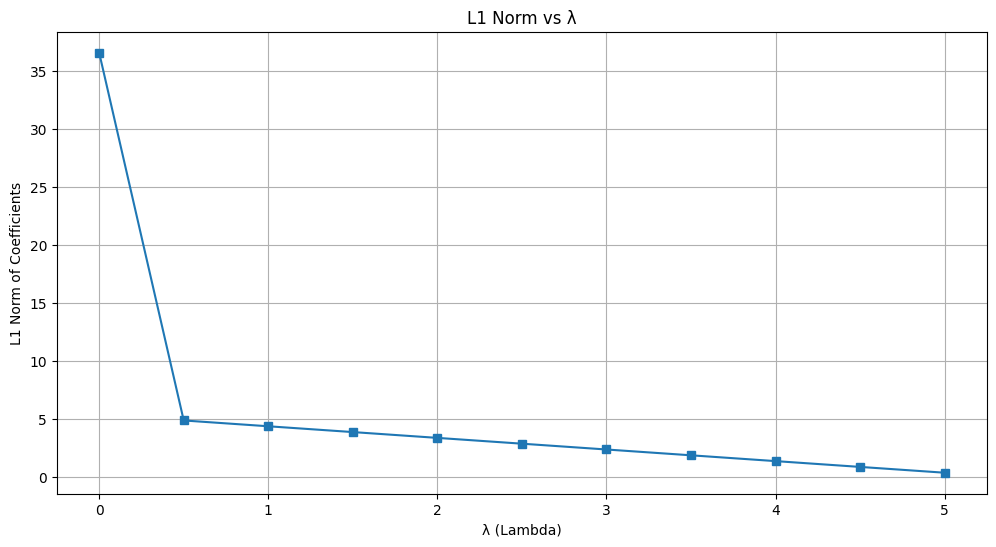

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(lambda_vals, l1_sums, marker='s')
plt.xlabel('λ (Lambda)')
plt.ylabel('L1 Norm of Coefficients')
plt.title('L1 Norm vs λ')
plt.grid(True)
plt.show()

Ridge Regression: Perform Ridge regression on the cost function as follows, vary regularization coefficient λ = 0 to 5 in steps of 0.5:
$$
J(w) = \frac{1}{N} \sum_{i=1}^{N} (y_i - (w_0 + w^T \phi_n(x_i)))^2 + \lambda (||w||)^2
$$

- Plot both training and test error for different values of λ or (ln λ) on the x-axis. What value of
hyperparameter λ is most suitable?
- Plot the L2 norm of w against λ.
- Plot the true function, and curves learnt with and without regularization. Compare and comment.

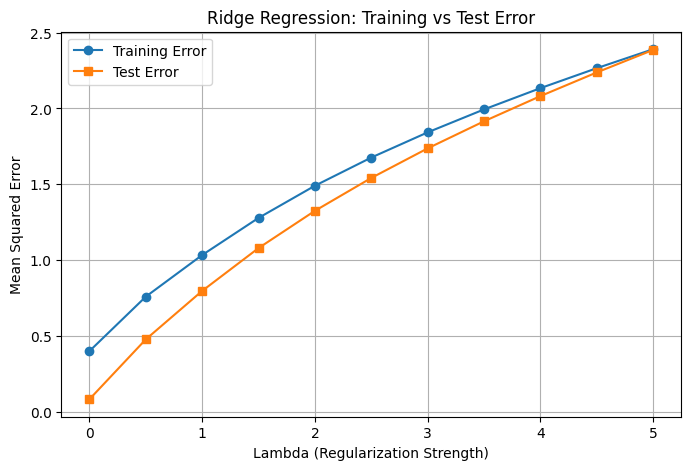

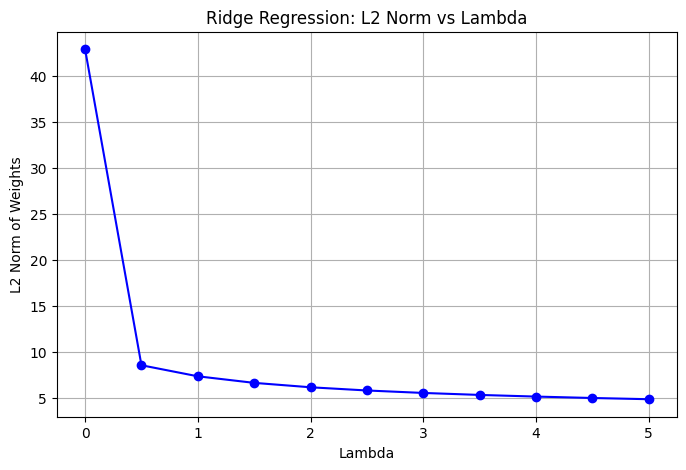

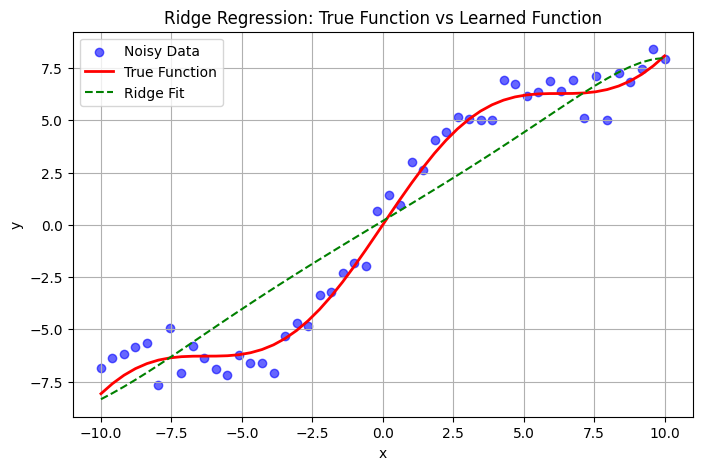

In [ ]:
def base_curve(x):
    return x + 2 * np.sin(0.5 * x)

def get_data():
    x_train = np.linspace(-10, 10, 50)
    noise_train = np.random.normal(0, np.sqrt(0.5), size=x_train.shape)
    y_train = base_curve(x_train) + noise_train

    x_test = np.linspace(-10, 10, 100)
    y_test_actual = base_curve(x_test)

    return x_train, y_train, x_test, y_test_actual

def transform_poly(x_train, x_test, degree=10):
    poly_feat = PolynomialFeatures(degree)
    x_train_poly = poly_feat.fit_transform(x_train.reshape(-1, 1))
    x_test_poly = poly_feat.transform(x_test.reshape(-1, 1))

    scaler = StandardScaler()
    x_train_poly_scaled = scaler.fit_transform(x_train_poly)
    x_test_poly_scaled = scaler.transform(x_test_poly)

    return x_train_poly_scaled, x_test_poly_scaled, poly_feat, scaler

def ridge_fit(x_train_poly, y_train, x_test_poly, y_test_actual, lambda_vals):
    train_mse, test_mse, ridge_norms = [], [], []

    for lam in lambda_vals:
        ridge_model = Ridge(alpha=lam, max_iter=10000)
        ridge_model.fit(x_train_poly, y_train)

        y_train_pred = ridge_model.predict(x_train_poly)
        y_test_pred = ridge_model.predict(x_test_poly)

        train_mse.append(mean_squared_error(y_train, y_train_pred))
        test_mse.append(mean_squared_error(y_test_actual, y_test_pred))
        ridge_norms.append(np.linalg.norm(ridge_model.coef_))

    return train_mse, test_mse, ridge_norms, ridge_model

x_train, y_train, x_test, y_test_actual = get_data()
x_train_poly, x_test_poly, poly_feat, scaler = transform_poly(x_train, x_test)

lambda_vals = np.arange(0, 5.5, 0.5)
train_mse, test_mse, ridge_norms, final_ridge_model = ridge_fit(x_train_poly, y_train, x_test_poly, y_test_actual, lambda_vals)

plt.figure(figsize=(8, 5))
plt.plot(lambda_vals, train_mse, label="Training Error", marker="o")
plt.plot(lambda_vals, test_mse, label="Test Error", marker="s")
plt.xlabel("Lambda (Regularization Strength)")
plt.ylabel("Mean Squared Error")
plt.title("Ridge Regression: Training vs Test Error")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(lambda_vals, ridge_norms, marker="o", color="blue")
plt.xlabel("Lambda")
plt.ylabel("L2 Norm of Weights")
plt.title("Ridge Regression: L2 Norm vs Lambda")
plt.grid(True)
plt.show()

x_values = np.linspace(-10, 10, 50)
y_values = base_curve(x_values) + np.random.normal(0, np.sqrt(0.5), size=x_values.shape)

x_values_poly = poly_feat.transform(x_values.reshape(-1, 1))
x_values_poly_scaled = scaler.transform(x_values_poly)
y_ridge_pred = final_ridge_model.predict(x_values_poly_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(x_values, y_values, label="Noisy Data", color="blue", alpha=0.6)
plt.plot(x_values, base_curve(x_values), label="True Function", color="red", linewidth=2)
plt.plot(x_values, y_ridge_pred, label="Ridge Fit", color="green", linestyle="dashed")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ridge Regression: True Function vs Learned Function")
plt.legend()
plt.grid(True)
plt.show()

(1) Training vs Test Error: Choosing the Right λ
The ideal λ is the one where test error is the lowest while training error stays reasonable.
If λ is too small (or 0), the model might overfit (high variance).
If λ is too large, it can overly restrict the model, causing underfitting (high bias).

(2) True Function vs Learned Curves (With & Without Regularization)
Without regularization, the model may fit the noise, leading to overfitting.
With regularization, the model smoothens, improving generalization to new data.

Does Lasso regression give sparser solution than Ridge regression (more number of zero components in w)?

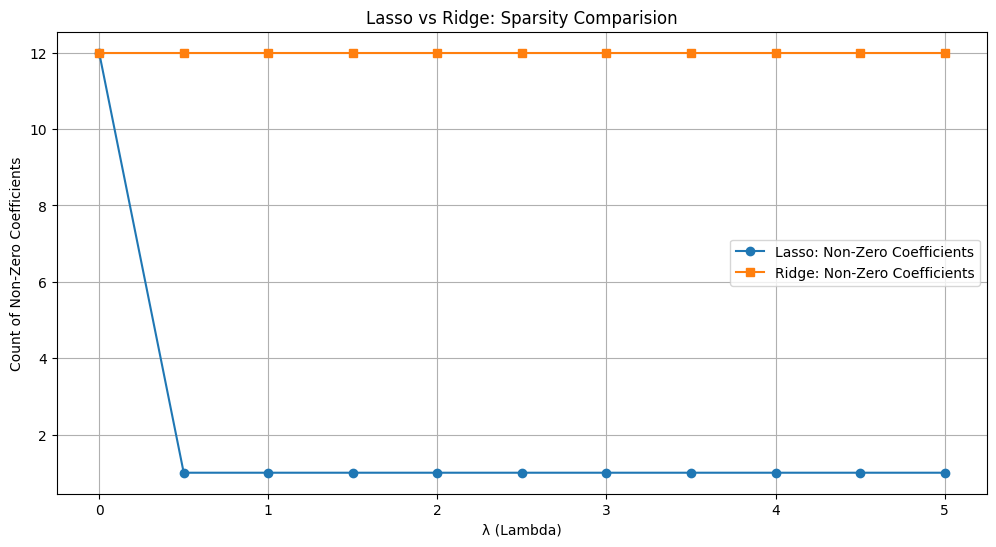

In [ ]:
ridge_coeff_counts = []
y_train = y_train.ravel()

for val in lambda_vals:
    ridge_model = Ridge(alpha=val, max_iter=10000)
    ridge_model.fit(x_train_poly, y_train)
    ridge_coeff_counts.append(np.count_nonzero(ridge_model.coef_))

plt.figure(figsize=(12, 6))
plt.plot(lambda_vals, non_zero_terms, label='Lasso: Non-Zero Coefficients', marker='o')
plt.plot(lambda_vals, ridge_coeff_counts, label='Ridge: Non-Zero Coefficients', marker='s')
plt.xlabel('λ (Lambda)')
plt.ylabel('Count of Non-Zero Coefficients')
plt.title('Lasso vs Ridge: Sparsity Comparision')
plt.legend()
plt.grid(True)
plt.show()

Lasso vs Ridge: Sparsity in Solutions

Lasso Regression (L1 Regularization): Penalizes the absolute values of coefficients, leading to many being exactly zero, creating a sparse model.

Ridge Regression (L2 Regularization): Penalizes the squared values of coefficients, shrinking them towards zero but rarely making them exactly zero.

# Question 2

### (a) Show the usage of scikit-learn’s linear regression module for the real estate price prediction regression problem. What is the RMS error on the test set?


In [ ]:
df = pd.read_excel(file_path, sheet_name="工作表1")

features = df.iloc[:, 1:-1]
target = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Test Set RMSE: {rmse:.2f}")

Test Set RMSE: 7.31


### (b) Based on the regression coefficients, what can you comment about the importance of different features? Is it correct to assume that larger coefficients mean more important features?


### Interpreting Model Coefficients

- Larger coefficients (in absolute value) suggest that small changes in that feature have a greater influence on the predicted outcome.
- Smaller coefficients indicate a weaker effect on the prediction.

However, raw coefficient values don’t always determine feature importance because:
  - Features have different scales (e.g., distance in meters vs. age in years).
  - A feature with a small coefficient but a wide range can still have a significant impact.

### (c) Now, standardize the dataset to have all features on a scale of 0 to 1. Re-learn the regression coefficients and now comment on the importance of different features.

In [ ]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(features)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_normalized, target, test_size=0.2, random_state=42)

scaled_model = LinearRegression()
scaled_model.fit(X_train_scaled, y_train)

y_pred_scaled = scaled_model.predict(X_test_scaled)

features = df.columns[1:-1]
scaled_coefficients = scaled_model.coef_

coef_df = pd.DataFrame({"Feature": features, "Coefficient": scaled_coefficients})
coef_df["Abs Coefficient"] = coef_df["Coefficient"].abs()
coef_df_sorted = coef_df.sort_values(by="Abs Coefficient", ascending=False)

print("\nFeature Influence After Normalization:")
print(coef_df_sorted)


Feature Influence After Normalization:
                                  Feature  Coefficient  Abs Coefficient
2  X3 distance to the nearest MRT station   -30.763164        30.763164
4                             X5 latitude    18.901127        18.901127
1                            X2 house age   -11.860790        11.860790
3         X4 number of convenience stores    10.914692        10.914692
0                     X1 transaction date     4.989657         4.989657
5                            X6 longitude    -2.736144         2.736144


Before Normalization
- In linear regression, larger absolute coefficient values suggest that the feature has a stronger influence on the target variable.
However, if features are on different scales (e.g., house age in years vs. distance in meters), larger coefficients may just reflect larger numerical ranges rather than real importance.

After Normalization (0 to 1 Scaling)
- Now, all features are scaled within the same range (0 to 1), eliminating the effect of different units.
This makes it valid to compare absolute coefficient values directly.
Features with larger absolute coefficients have a greater effect on the predicted outcome.

Overall,

- "X3 distance to the nearest MRT station" has the highest absolute coefficient (30.76), making it the most important feature in predicting house price.

- "X5 latitude" follows with an absolute coefficient of 18.90, meaning location (latitude) significantly impacts house prices.

- "X2 house age" (-11.86) and "X4 number of convenience stores" (10.91) are also relatively important.

- "X1 transaction date" (4.99) has a smaller impact, and "X6 longitude" (-2.73) has the least impact.

### (d) What is the distribution of the residuals?


The residuals are approximately normally distributed.

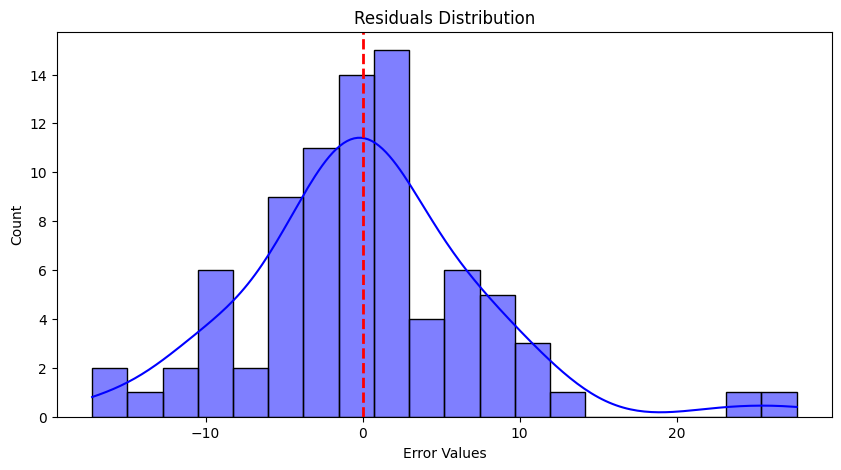

In [ ]:

errors = y_test - predictions

plt.figure(figsize=(10, 5))
sns.histplot(errors, bins=20, kde=True, color="blue")
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Error Values")
plt.ylabel("Count")
plt.title("Residuals Distribution")
plt.show()

### (e) Use cross-correlation to find the optimal set of features to use for regression. Using all possible feature sets of length 1, 2, 3, or 4, what is the optimal feature set as per the validation set and how does this set of features perform on the test set wrt the model learned on the entire feature set?

In [ ]:
features = df.iloc[:, 1:-1]
target = df.iloc[:, -1]

scaler = MinMaxScaler()
subset_evaluation = {}

for num_features in range(1, 5):
    for feature_subset in combinations(features.columns, num_features):
        selected_features = features[list(feature_subset)]
        selected_features_scaled = scaler.fit_transform(selected_features)

        model = LinearRegression()
        scores = cross_val_score(model, selected_features_scaled, target, cv=5, scoring="neg_root_mean_squared_error")

        mean_rmse = -np.mean(scores)
        subset_evaluation[feature_subset] = mean_rmse

optimal_features, optimal_rmse = min(subset_evaluation.items(), key=lambda x: x[1])

print(f"Optimal Feature Subset: {optimal_features}")
print(f"Validation RMSE for Optimal Subset: {optimal_rmse:.2f}")

features_optimal = features[list(optimal_features)]
features_optimal_scaled = scaler.fit_transform(features_optimal)

features_train_optimal, features_test_optimal, target_train, target_test = train_test_split(
    features_optimal_scaled, target, test_size=0.2, random_state=42
)

model_optimal = LinearRegression()
model_optimal.fit(features_train_optimal, target_train)

target_pred_optimal = model_optimal.predict(features_test_optimal)

rmse_optimal = np.sqrt(mean_squared_error(target_test, target_pred_optimal))

features_scaled = scaler.fit_transform(features)
features_train_full, features_test_full, target_train, target_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42
)

model_full = LinearRegression()
model_full.fit(features_train_full, target_train)
target_pred_full = model_full.predict(features_test_full)

rmse_full = np.sqrt(mean_squared_error(target_test, target_pred_full))

print(f"RMSE for Optimal Feature Set: {rmse_optimal:.2f}")
print(f"RMSE for Full Feature Model: {rmse_full:.2f}")

Optimal Feature Subset: ('X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude')
Validation RMSE for Optimal Subset: 8.78
RMSE for Optimal Feature Set: 7.37
RMSE for Full Feature Model: 7.31
